In [1]:
exec(open("init_notebook.py").read())
import pyodrx 
import numpy as np
import extensions, junctions
import matplotlib.pyplot as plt
#import two_line_merger
%matplotlib inline

current working dirC:\Users\abjaw\Documents\GitHub\junction-art


start points starting
C:\Users\abjaw\Documents\GitHub\esmini\bin\odrplot.exe C:/Users/abjaw/Documents/GitHub/esmini/bin/pythonroad.xodr


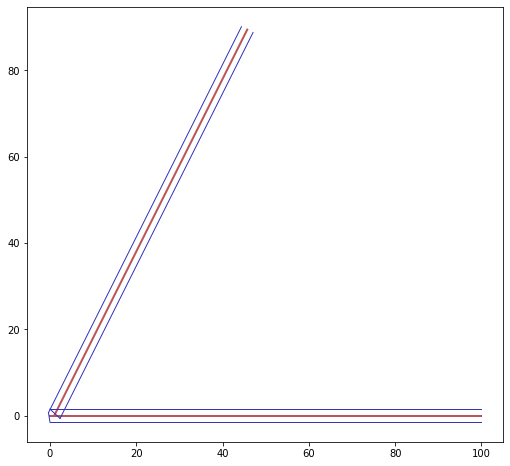

In [22]:
roadBuilder = junctions.RoadBuilder()
#1. create two arbitrary roads
roads = []
roads.append(pyodrx.create_straight_road(0))
#roads.append(pyodrx.create_straight_road(1, junction=1))
# roads.append(pyodrx.create_cloth_arc_cloth(.05, arc_angle=(np.pi - np.pi/4), cloth_angle=np.pi/8, r_id=1, junction = 1))
roads.append(roadBuilder.createParamPoly3(1, False, 0, 0, -2, 1, 0, 0, 2, -2,'normalized', length=20))
# roads.append(roadBuilder.createSimpleCurveWithLongArc(1, -np.pi/16, True, curvature = 0.5))
# roads.append(roadBuilder.createS(1, -np.pi/20, True, curvature = 0.1))
roads.append(pyodrx.create_straight_road(2))

roads[0].add_successor(pyodrx.ElementType.road,1, pyodrx.ContactPoint.end)

roads[1].add_predecessor(pyodrx.ElementType.road,0,pyodrx.ContactPoint.start)
roads[1].add_successor(pyodrx.ElementType.road,2,pyodrx.ContactPoint.end)

roads[2].add_predecessor(pyodrx.ElementType.road,1, pyodrx.ContactPoint.end)

#2. create a connection road

# con1 = pyodrx.Connection(0,1,pyodrx.ContactPoint.start)
# con1.add_lanelink(-1,-1)


#3. create junction
# junction = pyodrx.Junction('test',1)
# junction.add_connection(con1)

#junction = pyodrx.create_junction([roads[1]], 1, roads)

#print(junction.connections)

#4. make xord, add roads, add junctions, adjust

# create the opendrive
odr = pyodrx.OpenDrive('myroad')
for r in roads:
    odr.add_road(r)
    
# odr.create_junction()

#odr.add_junction(junction)
odr.adjust_roads_and_lanes()

#pyodrx.prettyprint(odr.get_element())

extensions.view_road(odr,os.path.join('..','C:\\Users\\abjaw\\Documents\\GitHub\\esmini'))

In [ ]:
roads[1].curveType